In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns

preprocessing：前処理<br>
StandardScaler：標準化<br>
log_loss：対数尤度<br>
accuracy_score：正答率<br>
precision_recall_fscore_support：適合率,再現率,F1値<br> confusion_matrix：クロス集計表<br>
mean_absolute_error：平均絶対誤差

In [54]:
#データを読み込み
df= pd.read_csv('ks-projects-201801.csv/ks-projects-201801.csv')
#最初の五行を表示
display(df.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [55]:
#欠損値がある行数を確認
display(df.isnull().sum())
#各列のデータタイプを確認
display(df.dtypes)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [56]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_success = df[df['state']=='successful']
df_failed =  df[df['state']=='failed']
#両方を結合
df_SorF = pd.concat([df_success,df_failed])
#stateの要素の個数
df_SorF['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

In [58]:
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_SorF['category'])
df_SorF['category'] = le.transform(df_SorF['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_SorF['main_category'])
df_SorF['main_category'] = le.transform(df_SorF['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_SorF['currency'])
df_SorF['currency'] = le.transform(df_SorF['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_SorF['state'])
df_SorF['state'] = le.transform(df_SorF['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_SorF['country'])
df_SorF['country'] = le.transform(df_SorF['country'])

df_SorF.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,22,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16,22,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,1,100,22,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,1,761,9,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,250.0,2012-08-02 14:11:32,250.0,1,7,22,250.00,250.00,250.00


In [59]:
#成功と、失敗でデータを分ける
df_S = df_SorF[df_SorF['state']==1]
df_F = df_SorF[df_SorF['state']==0]

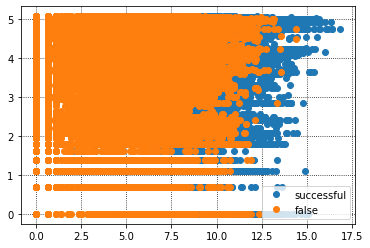

In [60]:
#Log(0)対策
delta=1

#「goal」、「backers」の対数の関係を確認
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_S["pledged"]+delta), np.log(df_S["category"]+delta), 'o', color='C0', label='successful')
plt.plot(np.log(df_F["pledged"]+delta), np.log(df_F["category"]+delta), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

In [61]:
#目的変数'state'を正解としてyに格納
y = df_SorF['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_SorF[['goal', 'category']].values

In [62]:
#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

24487 129603
68116 109469
Accuracy  = 53.542%
Recall    = 81.720%
Precision = 45.789%
